In [2]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# from tensorflow import get_logger
# get_logger().setLevel("ERROR")

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import cv2
import random
import os
import glob

In [3]:
SEED = 24756
np.random.seed(SEED)

In [15]:
train_folder = "chest_xray/train"
valid_folder = "chest_xray/val"
test_folder  = "chest_xray/test"

In [27]:
# X-ray scan Dataset Distribution 
dataset_dist = pd.DataFrame({
    "Data Part": ["Train", "Validation", "Test"],
    "Pneumonia": [
        len(os.listdir(f"{train_folder}/PNEUMONIA")),
        len(os.listdir(f"{valid_folder}/PNEUMONIA")),
        len(os.listdir(f"{test_folder}/PNEUMONIA")),
    ],
    "Normal": [
        len(os.listdir(f"{train_folder}/NORMAL")),
        len(os.listdir(f"{valid_folder}/NORMAL")),
        len(os.listdir(f"{test_folder}/NORMAL")),
    ]
})

dataset_dist["Total"] = dataset_dist["Pneumonia"] + dataset_dist["Normal"]
dataset_dist

,Data Part,Pneumonia,Normal,Total
0,Train,3876,1342,5218
1,Validation,9,9,18
2,Test,390,234,624


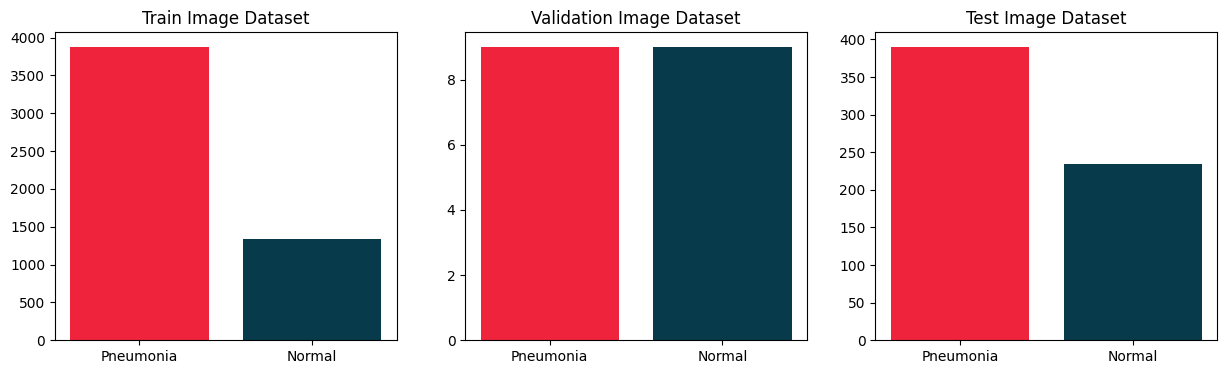

In [25]:
# Distribution Count Plot

color_map = ["#EF233C", "#073B4C"]
xaxis_text = ["Pneumonia", "Normal"]

fig = plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
# Train
plt.bar(
    x=xaxis_text, 
    height=(
        len(os.listdir(f"{train_folder}/PNEUMONIA")), 
        len(os.listdir(f"{train_folder}/NORMAL"))
    ),
    color=color_map
)
plt.title("Train Image Dataset")

plt.subplot(1, 3, 2)
# Validation
plt.bar(
    x=xaxis_text, 
    height=(
        len(os.listdir(f"{valid_folder}/PNEUMONIA")), 
        len(os.listdir(f"{valid_folder}/NORMAL"))
    ),
    color=color_map
)
plt.title("Validation Image Dataset")

plt.subplot(1, 3, 3)
# Train
plt.bar(
    x=xaxis_text, 
    height=(
        len(os.listdir(f"{test_folder}/PNEUMONIA")), 
        len(os.listdir(f"{test_folder}/NORMAL"))
    ),
    color=color_map
)
plt.title("Test Image Dataset")

plt.show()

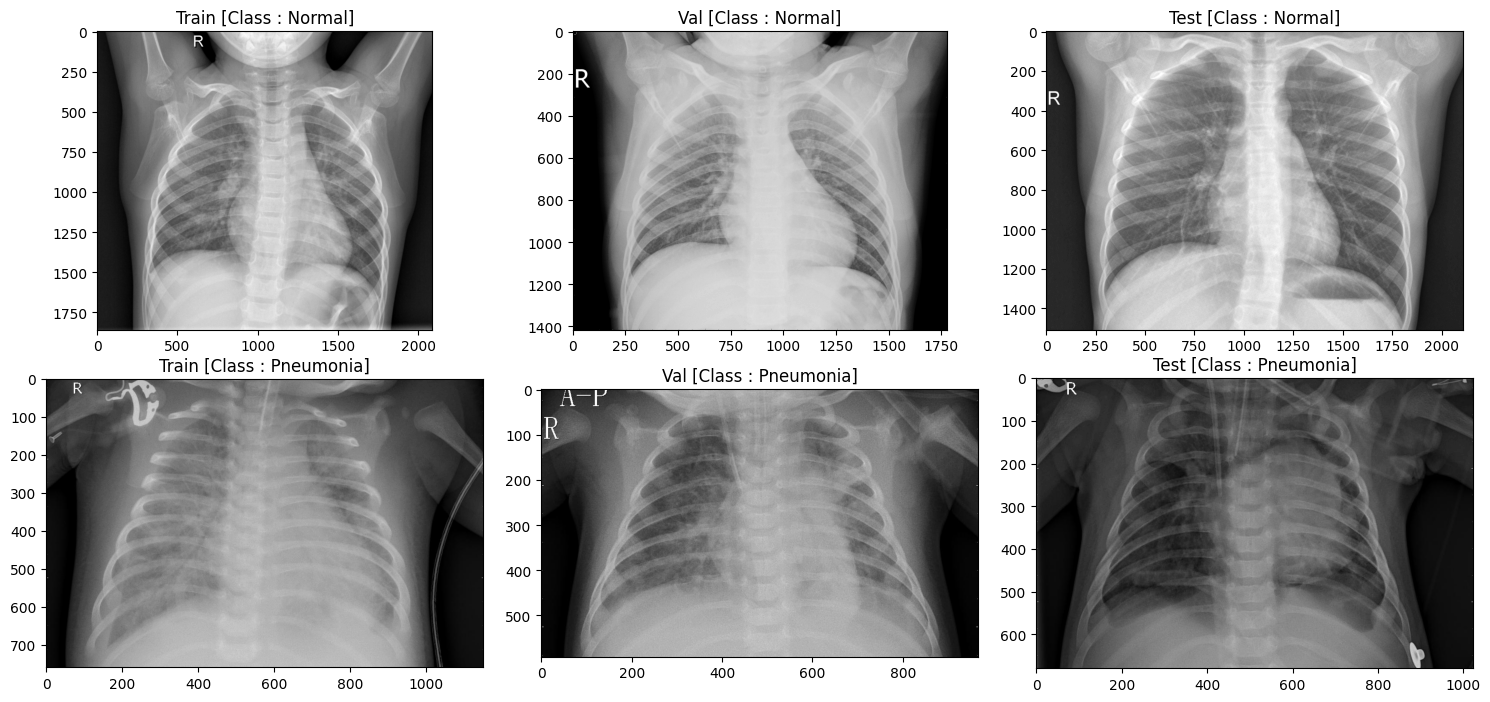

In [19]:

fig, ax = plt.subplots(2, 3, figsize=(15, 7)) 
# Flatten the axes array
ax = ax.ravel()  
plt.tight_layout()

# Iterate across each image folder
for i , folder in enumerate([train_folder , valid_folder , test_folder]):
    folder_lab = str.split(folder, "/")[1].title()
    # Create images for normal cases
    ax[i].imshow(plt.imread(f'{folder}/NORMAL/{os.listdir(f"{folder}/NORMAL/")[1]}'), cmap='gray')
    ax[i].set_title(f'{folder_lab} [Class : Normal]')
    # Create images for Pneumonia cases
    ax[i + 3].imshow(plt.imread(f'{folder}/PNEUMONIA/{os.listdir(f"{folder}/PNEUMONIA/")[1]}'), cmap='gray')
    ax[i + 3].set_title(f'{folder_lab} [Class : Pneumonia]')
# plt.savefig("img/x-ray_plot.png")
plt.show()